### Exercise 1


$$ Y = \sum_{i=1}^{i=n} X_i \ , \;\; X_i \sim Bernoulli(1/2) $$
$$ E(Y) = \sum_{i=1}^{i=n} E(X_i) = n/2 $$

$$ Z = c (Y - (n - Y)) = c(2Y -n) $$

$$ E(Z) = c (2E(Y) -n) = 2cE(Y) - cn = cn - cn = 0$$



In [1]:
import numpy as np
from functools import reduce

np.random.seed(42)
# Valor inicial de de c
c=2

# Genero una muestra de tamaño n de variables de Bernoulli(0.5)
muestra = np.random.binomial(1,0.5,1000)


# dup_or_halve
def dup_or_halve(c,x):
    if (x==1):
        return 2*c
    else:
        return c/2
    
res=reduce(dup_or_halve,muestra,c)
print (res)

0.03125


### Exercise 2

$(\Rightarrow)$


If $Var(X)=0$ then

$$ E[(X - \mu)^2] = \int (x - \mu)^2 dF_X(x) = 0 $$

If $X$ is discrete, then 

$$ \sum_x (X  - \mu)^2 P(X=x) = 0 $$

If $P(X=x) \neq 0$ then $X=\mu$

If $X$ is continuos, then

$$ \int (x-\mu)^2 f(x)d(x) = 0$$

If $f(x)\neq 0$ then  $(x - \mu)^2 = 0$, so $X=\mu$

$(\Leftarrow)$

There is a constant such that $P(X=c) = 1$. 

$$Var(X) = E(X^2) - \mu^2 = c^2 - c^2 = 0 $$ 

### Excercise 3 (Media y varianza de máximo de n uniformes)

Dado que cada $X_i \sim \text{Uniform}(0,1)$

$$ F_{Y_n}(x) = P(Y_n \leq x ) = P(X_1 \leq x)P(X_2 \leq x)\ldots P(X_n \leq x)  = x^n$$


$$ E(Y_n) = \int_0^1 x dF_X(x) = n \int_0^1  xx^{n-1}dx = n \int_0^1 x^n = \frac{n}{n+1} $$
 

In [2]:
# Genero una muestra de tamaño n de variables de Uniform(0,1)

s=0
pruebas=100000

for i in range(pruebas):
    muestra = np.random.uniform(0,1,100)
    s +=np.amax(muestra)

s/pruebas



0.9901329898955256

### Exercise 4 (Media y varianza de un random walk)

$$ E(Y_n) = E(\sum_{i=1}^{n} X_i )= \sum E(X_i)$$

$$ E(X_i) = (1 - p) - p = 1 -2p $$

$$ E(Y_n) = n(1-2p) $$

$$ Var(X_i) = E(X_i^2) - \mu^2 = 1 - \mu^2 =  1 - (1- 2p)^2 = 4p(1 - p) $$

$$ Var(Y_n) = 4np(1-p) $$


In [3]:
# Muestra de n bernoulli

n=10000
p=0.3

print("La media calculada es:", n*(1-2*p))
print("La varianza calculada es:", 4*n*p*(1-p))

# left_or_right
def left_or_right(c,x):
    if (x==1):
        return c-1
    else:
        return c+1
    

def experimento(veces):
    resultados = np.zeros(veces)
    for i in range(veces): 
        muestra = np.random.binomial(1,p,10000)
        res=reduce(left_or_right,muestra,0)
        resultados[i]=res
        
    print(np.mean(resultados))
    print(np.var(resultados))
experimento(10000)
        
    

La media calculada es: 4000.0
La varianza calculada es: 8400.0
4002.0092
8248.83591536


### Exercise 5 (Distribución Geométrica)

$$ E(X) = \sum_{x=1}^\infty xP(X=x) = \sum_{x=1}^\infty p(1-p)^{x-1} xP(X=x)$$ 


Hacemos $r=1-p$ para facilitar las cuentas

$$ E(X) = (1-r)  \sum_{x=1}^\infty xr^{x-1} = (1-r)  \sum_{x=1}^\infty \frac{d}{dr}r^{x} =  (1-r) \frac{d}{dr}  \sum_{x=1}^\infty r^{x} = (1-r)  \frac{1}{(1-r)^2} = \frac{1}{1-r} = \frac{1}{p}  $$ 


(
Usamos la propiedad siguiente: 

$$\sum_{x=1}^\infty r^{x} = \frac{1}{1-r}$$
)


La varianza es un poco más complicada, la solución está [aquí](https://math.stackexchange.com/questions/1299465/proof-variance-of-geometric-distribution), y vale $(1-p)/p^2$



In [13]:
# Muestra de n Geométricas
p=0.3

# Calculadas
print ('Media calculada: ', 1/p)
print ('Varianza calculada, ', (1-p)/p**2 )

muestra = np.random.geometric(p,10000)
print(np.mean(muestra))
print(np.var(muestra))


Media calculada:  3.3333333333333335
Varianza calculada,  7.777777777777778
3.3405
7.77015975


### Exercise 6 (Demostración de la Law of the lazy stat para el caso discreo)

[Wikipedia](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician)

### Exercise 9 (Computer Experiment)



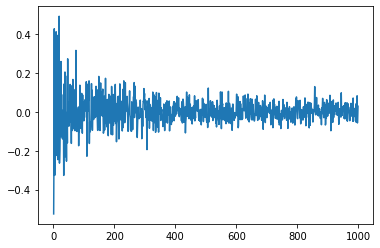

In [22]:
import matplotlib.pyplot as plt

def nnormal(n):
  muestra = np.random.normal(0,1,n)
  return np.mean(muestra)

def ncauchy(n):
  muestra = np.random.standard_cauchy(n)
  return np.mean(muestra)


x = np.arange(1,1000)
y = np.vectorize(nnormal)(x)
y1 = np.vectorize(ncauchy)(x)


plt.plot(x,y)


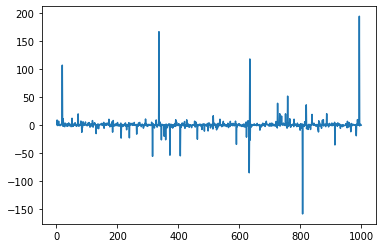

In [21]:
plt.plot(x,y1)
